**LabML03a**

Purpose: Identify clusters of Gira docking station

1 import libraries needed:numpy, sklearn, matplotlib and pandas

2 generate a sample of blobs and convert it into a dataframe called df1

3 Verify datatype

4 Plot the blobs

5 calculete WCSS

6 plot the new chart with centroids

7 identify to what group does each item belongs

Comment the code

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file='https://github.com/masterfloss/data/blob/main/giras201030.csv?raw=true'
dfGiras=pd.read_csv(file,sep=';')

In [3]:
dfGiras.head()

,desigcomercial,numbicicletas,numdocasvacias,position,add_data,add_hora
0,206 - Av. Brasília / Doca de Alcântara,2,20,"{""coordinates"": [-9.175, 38.701], ""type"": ""Poi...",2019-07-30,15:07:34.
1,110 - Rua de Moscavide,5,13,"{""coordinates"": [-9.097068, 38.778466], ""type""...",2020-10-30,19:49:28.
2,208 - Cais das Pombas,11,11,"{""coordinates"": [-9.14373, 38.70523], ""type"": ...",2020-10-30,19:49:29.
3,415 - Av. Duque de Ávila / Av. Conde Valbom,2,18,"{""coordinates"": [-9.148443, 38.735188], ""type""...",2020-10-30,19:49:29.
4,423 - Av. Conde Valbom / Rua Marquês Sá da Ban...,5,5,"{""coordinates"": [-9.152295, 38.737911], ""type""...",2020-10-30,19:49:29.


In [4]:
print(dfGiras)

                                       desigcomercial  numbicicletas  \
0              206 - Av. Brasília / Doca de Alcântara              2   
1                              110 - Rua de Moscavide              5   
2                               208 - Cais das Pombas             11   
3         415 - Av. Duque de Ávila / Av. Conde Valbom              2   
4   423 - Av. Conde Valbom / Rua Marquês Sá da Ban...              5   
..                                                ...            ...   
91      449 - Av. 5 de Outubro / Rua da Cruz Vermelha              2   
92              484 - Rua Professor Vieira de Almeida              3   
93  212 - Av. Infante Dom Henrique / Terminal de C...             10   
94                        107 - Rotunda dos Vice-Reis              8   
95                  473 - Av. do Brasil / Av. de Roma              0   

    numdocasvacias                                           position  \
0               20  {"coordinates": [-9.175, 38.701], "type": 

In [5]:
dfGiras.loc[0,'position'].split()[1].replace('[','').replace(',','')

'-9.175'

In [6]:
dfGiras.loc[0,'position'].split()

['{"coordinates":', '[-9.175,', '38.701],', '"type":', '"Point"}']

In [7]:
dfGiras.loc[0,'position'].split()

['{"coordinates":', '[-9.175,', '38.701],', '"type":', '"Point"}']

In [8]:
for i in range(len(dfGiras['position'])):
    dfGiras.loc[i,'long']=dfGiras.loc[i,'position'].split()[1].replace('[','').replace(',','')
    dfGiras.loc[i,'lat']=dfGiras.loc[i,'position'].split()[2].replace('],','')
    
    

In [9]:
dfGiras.head()

,desigcomercial,numbicicletas,numdocasvacias,position,add_data,add_hora,long,lat
0,206 - Av. Brasília / Doca de Alcântara,2,20,"{""coordinates"": [-9.175, 38.701], ""type"": ""Poi...",2019-07-30,15:07:34.,-9.175,38.701
1,110 - Rua de Moscavide,5,13,"{""coordinates"": [-9.097068, 38.778466], ""type""...",2020-10-30,19:49:28.,-9.097068,38.778466
2,208 - Cais das Pombas,11,11,"{""coordinates"": [-9.14373, 38.70523], ""type"": ...",2020-10-30,19:49:29.,-9.14373,38.70523
3,415 - Av. Duque de Ávila / Av. Conde Valbom,2,18,"{""coordinates"": [-9.148443, 38.735188], ""type""...",2020-10-30,19:49:29.,-9.148443,38.735188
4,423 - Av. Conde Valbom / Rua Marquês Sá da Ban...,5,5,"{""coordinates"": [-9.152295, 38.737911], ""type""...",2020-10-30,19:49:29.,-9.152295,38.737911


In [10]:
df1=dfGiras[['long','lat']]

df1.dtypes

long    object
lat     object
dtype: object

In [11]:
df1.loc[:,'long']=pd.to_numeric(df1.loc[:,'long'])
df1.loc[:,'lat']=pd.to_numeric(df1.loc[:,'lat'])


/Users/alehxh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/alehxh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
df1.dtypes

long    float64
lat     float64
dtype: object

Text(0, 0.5, 'lat')

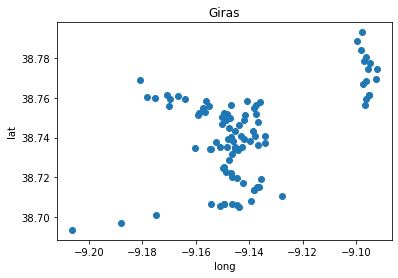

In [13]:
plt.scatter(df1['long'], df1['lat'])
plt.title('Giras')
plt.xlabel('long')
plt.ylabel('lat')

In [ ]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(df1)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

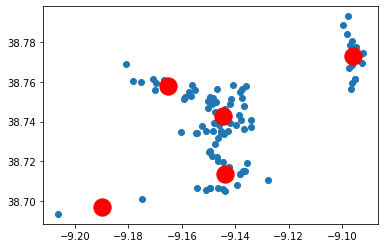

In [15]:
model1 = KMeans(n_clusters=5, init='k-means++', max_iter=400, n_init=10, random_state=0)
model1.fit_predict(df1)
plt.scatter(df1["long"], df1["lat"])
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [16]:
model1.predict(df1.loc[0:0,:])

array([4], dtype=int32)

In [17]:
model1.predict(df1)

array([4, 1, 0, 2, 2, 0, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2,
       2, 0, 2, 3, 0, 3, 2, 3, 2, 0, 2, 2, 3, 1, 3, 2, 0, 2, 2, 0, 3, 2,
       0, 2, 2, 1, 2, 2, 0, 3, 4, 4, 3, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 0,
       1, 0, 3, 1, 2, 2, 0, 2, 2, 2, 3, 1, 0, 2, 0, 2, 3, 3, 2, 0, 1, 2,
       2, 1, 2, 2, 3, 0, 1, 2], dtype=int32)